<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/ML%20Algorithms/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class KMeans:
  def __init__(self,K=5,max_iters = 100,steps = False):
    self.K = K
    self.max_iters = max_iters
    self.steps = steps

    #List of Buckets for K 
    self.clusters = [[] for i in range(self.K)]
    #Storing Mean Centers for each cluster
    self.centroids = []
    
  def euclidean_distance(self,sample,point):
      return np.sqrt(np.sum((sample-point)**2))

  def cluster_label(self,clusters):
    labels = np.empty(self.n_samples)
    for index,cluster in enumerate(clusters):
      for sample_index in cluster:
        labels[sample_index] = index
    return labels
    

  def converge(self,centroids_old,centroids_new):
    distances = [self.euclidean_distance(centroids_old[i],centroids_new[i]) for i in range(self.K)]
    return sum(distances) == 0

    

  def calculate_centroids(self,clusters):
    centroids = np.zeros((self.K,self.n_features))
    for i,cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster],axis = 0)
      centroids[i] = cluster_mean
    return centroids

    

  def plot(self):
    fig,ax = plt.subplots(figsize = (12,8))
    for i,index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)
    for point in self.centroids:
      ax.scatter(*point,marker = 'x',linewidth = 2,color = "black")
    plt.show()
  def closest_centroid(self,sample,centroids):
      distances = [self.euclidean_distance(sample,point) for point in centroids]
      closest_index = np.argmin(distances)
      return closest_index
  def clustering(self,centroids):
      clusters = [[] for i in range(self.K)]

      for index,sample in enumerate(self.X):
        centroid_index = self.closest_centroid(sample,centroids)
        clusters[centroid_index].append(index)
      return clusters
  
  def predict(self,X):
    self.X = X
    self.n_samples,self.n_features = self.X.shape

    random_sample = np.random.choice(self.n_samples,self.K,replace = False)
    self.centroids = [self.X[index] for index in random_sample]

    for i in range(self.max_iters):
      self.clusters = self.clustering(self.centroids)
      
      old_centroids = self.centroids
      self.centroids = self.calculate_centroids(self.clusters)

      if self.converge(old_centroids,self.centroids):
        break
      if self.steps:
        self.plot()

      return self.cluster_label(self.clusters)

   

In [ ]:
from sklearn import datasets

In [ ]:
np.random.seed(42)
x,y = datasets.make_blobs(centers=3,n_samples = 500,n_features =2,shuffle = True,random_state = 42)

In [ ]:
clusters = len(np.unique(y))
print(clusters)

3


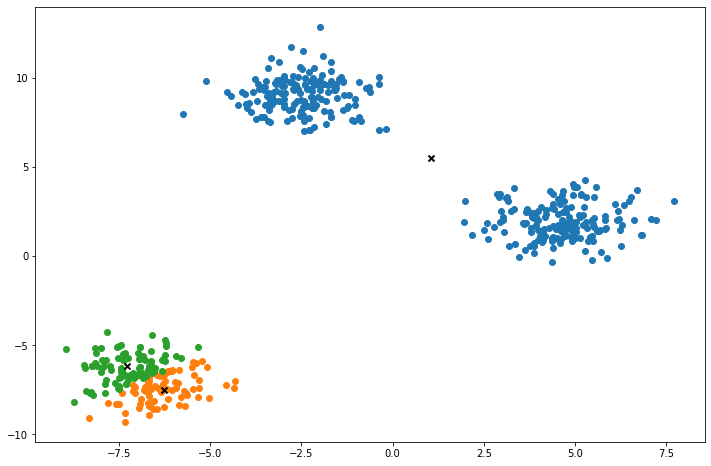

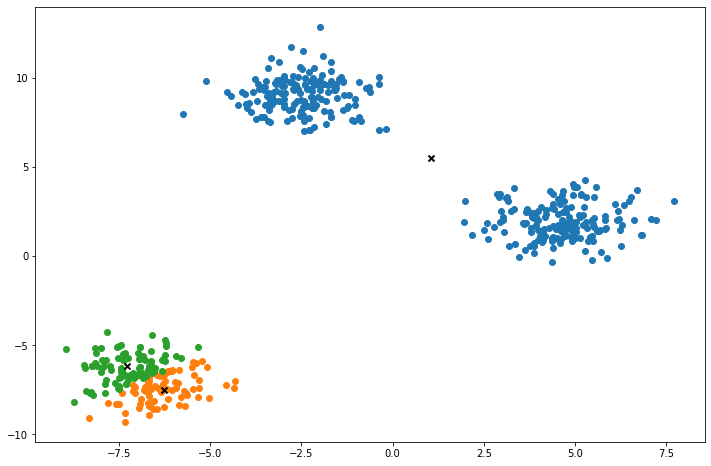

In [ ]:
model = KMeans(K=clusters,max_iters = 150,steps = True)
y_pred = model.predict(x)
model.plot()